In [28]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [29]:
evt_x = np.loadtxt("data/fit-data-3.txt")

In [30]:
evt_x.max()

np.float64(333.47577029952066)

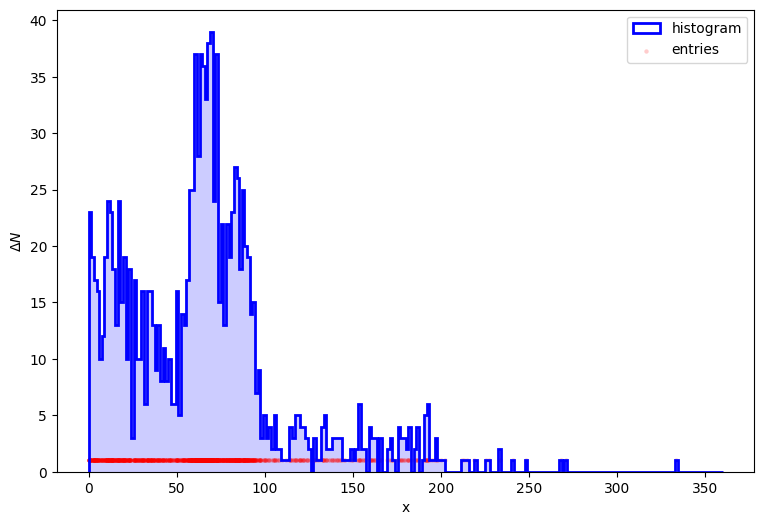

In [84]:
fig, ax = plt.subplots(figsize=(9, 6))
n_bins = 240
x_range = (0, 360)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 1), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [85]:
#bins

In [86]:
data_x = (bins + (bins[1] - bins[0])/2)[:-1]
#print(data_x)
delta_x = bins[1] - bins[0]
print("𝚫x = {:.2f}".format(delta_x))

𝚫x = 1.50


In [87]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

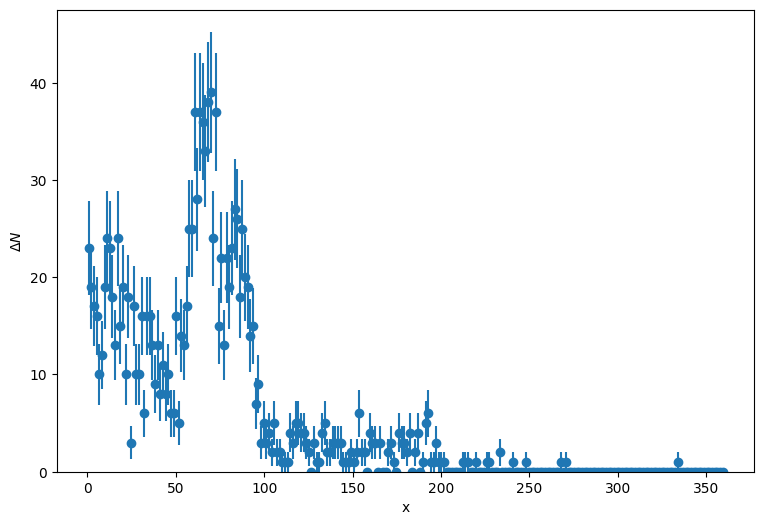

In [88]:
plt.figure(figsize=(9, 6))
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [89]:
def bkg_pdf(x, l):
    return np.exp(-x / l) / l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2 / 2)/math.sqrt(2 * math.pi * sigma**2)
def bkg_model(x, b, l):
    return b * bkg_pdf(x, l)
def sig_model(x, s, mu, sigma):
    return s * sig_pdf(x, mu, sigma)
def fit_model(x, b, l, s1, mu1, sigma1, s2, mu2, sigma2):
    return bkg_model(x, b, l) + sig_model(x, s1, mu1, sigma1) + sig_model(x, s2, mu2, sigma2)

In [90]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, 700, 70, 80, 6, 60, 70, 80, 6, name=("B", "$\lambda$", "S1", "$\mu_1$", "$\sigma_1$", "S2", "$\mu_2$","$\sigma_2$"))
m.limits["$\sigma_1$"] = (0, 20)
m.limits["$\sigma_2$"] = (0, 20)
m.limits["$\mu_1$"] = (50, 100)
m.limits["$\mu_2$"] = (50, 100)

In [91]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 160.3 (χ²/ndof = 1.2)      │              Nfcn = 388              │
│ EDM = 7.83e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │  1.08e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ 𝜆    │    66     │     4     │            │            │         │         │       │
│ 2 │ S1   │    490    │    40     │            │            │         │         │       │
│ 3 │ 𝜇₁   │   65.8    │    0.6    │            │            │   50    │   100   │       │
│ 4 │ 𝜎₁   │    6.1    │    0.5    │            │            │    0    │   20    │       │
│ 5 │ S2   │    280    │    33     │            │            │         │         │       │
│ 6 │ 𝜇₂   │   85.6    │    0.8    │            │            │   50    │   100   │       │
│ 7 │ 𝜎₂   │    5.5    │    0.6    │            │            │    0    │   20    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────┐
│    │        B        𝜆       S1       𝜇₁       𝜎₁       S2       𝜇₂       𝜎₂ │
├────┼─────────────────────────────────────────────────────────────────────────┤
│  B │ 2.65e+03       74   -0.4e3      1.9    -3.20   -0.3e3     -2.1     -3.3 │
│  𝜆 │       74     18.5       -5      0.0     0.02      -20     -0.1     -0.3 │
│ S1 │   -0.4e3       -5 1.58e+03      7.5    10.53   -0.5e3     14.3     -9.4 │
│ 𝜇₁ │      1.9      0.0      7.5     0.36     0.12     -9.2      0.3     -0.2 │
│ 𝜎₁ │    -3.20     0.02    10.53     0.12    0.248    -7.47     0.21    -0.13 │
│ S2 │   -0.3e3      -20   -0.5e3     -9.2    -7.47  1.1e+03    -12.5     11.9 │
│ 𝜇₂ │     -2.1     -0.1     14.3      0.3     0.21    -12.5    0.666     -0.3 │
│ 𝜎₂ │     -3.3     -0.3     -9.4     -0.2    -0.13     11.9     -0.3    0.383 │
└────┴─────────────────────────────────────────────────────────────────────────┘

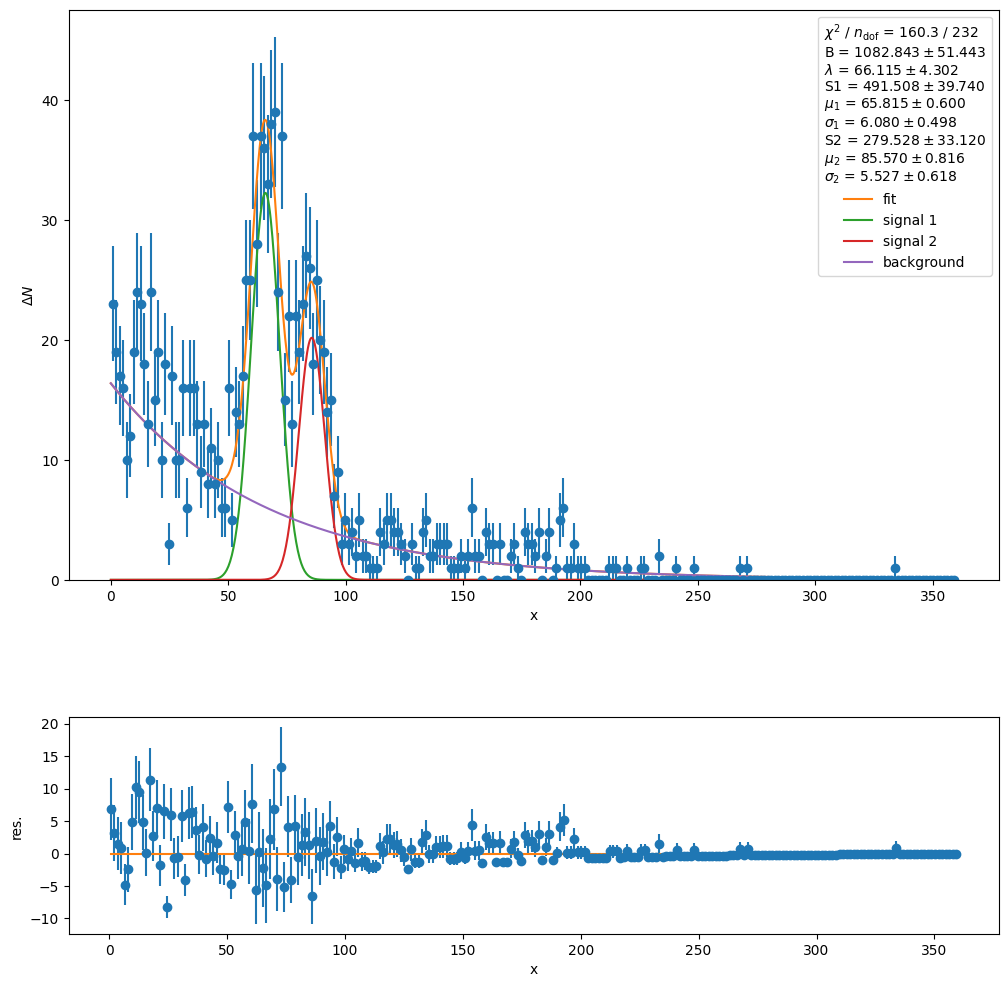

In [92]:
import matplotlib.gridspec as gridspec
data_x_f = np.linspace(0, bins[-1], 1000)
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, *m.values[0:2])
sig1_y_f = sig_model(data_x_f, *m.values[2:5])
sig2_y_f = sig_model(data_x_f, *m.values[5:])

plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig1_y_f, label="signal 1")
ax0.plot(data_x_f, sig2_y_f, label="signal 2")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax.legend()
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, (data_y - fit_model(data_x, *m.values)), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)

fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()

In [93]:
nn = data_yerr >0
pull = (data_y[nn] - fit_model(data_x[nn], *m.values))/data_yerr[nn]

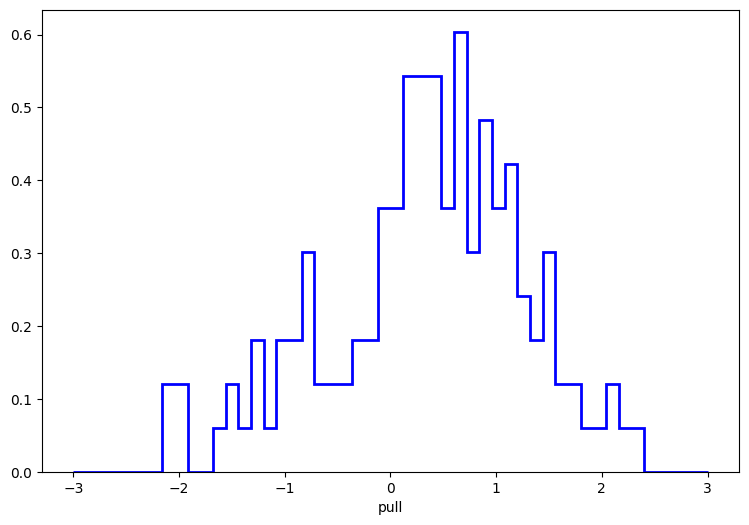

mean:  0.29115735341866095
sigma:  1.033756331369732


In [94]:
fig, ax = plt.subplots(figsize=(9,6))
n_bins = 50
x_range = (-3, 3)
n, b, p = ax.hist(pull, n_bins, range=x_range, density=True, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
plt.xlabel('pull')
plt.show()
print("mean: ", pull.mean())
print("sigma: ", pull.std(ddof=0))